In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Salinan Online Retail Data.csv')


In [4]:
print("Dimensi dataset:", df.shape)
print("Lima Baris Pertama:")
df.head()

Dimensi dataset: (461773, 7)
Lima Baris Pertama:


,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


In [5]:
print("\nInfo dfset:")
df.info()


Info dfset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


In [6]:
print("\nDeskripsi Statistik:")
df.describe()


Deskripsi Statistik:


,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


In [7]:
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64


In [8]:
# Cek apakah ada nilai kosong di dfset
print("\nApakah Ada Missing Values di dfset?")
print(df.isnull().any().any())


Apakah Ada Missing Values di dfset?
True


In [9]:
# Cek jumlah df duplikat
print("\nJumlah df Duplikat:")
print(df.duplicated().sum())

# Contoh df duplikat
print("\nContoh df Duplikat:")
df[df.duplicated()].head(100)



Jumlah df Duplikat:
6479

Contoh df Duplikat:


,order_id,product_code,product_name,quantity,order_date,price,customer_id
173,493435,21678,PAISLEY PATTERN STICKERS,2,2010-01-04 12:57:00,0.85,13206.0
255,493442,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-01-04 13:36:00,2.10,13821.0
271,493442,20712,JUMBO BAG WOODLAND ANIMALS,1,2010-01-04 13:36:00,1.95,13821.0
272,493442,21737,SET 3 WICKER LOG BASKETS,1,2010-01-04 13:36:00,19.95,13821.0
284,493442,84671B,CROCHET BEAR WITH BLUE STRIPES,1,2010-01-04 13:36:00,2.55,13821.0
...,...,...,...,...,...,...,...
11902,494638,22139,RETRO SPOT TEA SET CERAMIC 11 PC,1,2010-01-17 11:03:00,4.95,16782.0
11903,494638,21987,PACK OF 6 SKULL PAPER CUPS,1,2010-01-17 11:03:00,0.65,16782.0
11904,494638,21443,OLIVE CHALET BIRDFEEDER,1,2010-01-17 11:03:00,3.75,16782.0
11912,494638,21054,NURSE'S BAG SOFT TOY,1,2010-01-17 11:03:00,8.95,16782.0


In [10]:
# Cek apakah ada df duplikat di kolom order_id
duplicate_order_id = df['order_id'].duplicated().sum()

print(f"Jumlah df Duplikat di Kolom order_id: {duplicate_order_id}")

# Menampilkan contoh df duplikat jika ada
if duplicate_order_id > 0:
    print("\nContoh df Duplikat pada order_id:")
    print(df[df['order_id'].duplicated(keep=False)])
else:
    print("\nTidak ada duplikasi pada kolom order_id.")


Jumlah df Duplikat di Kolom order_id: 436472

Contoh df Duplikat pada order_id:
       order_id product_code                     product_name  quantity  \
3        493413        21724  PANDA AND BUNNIES STICKER SHEET         1   
4        493413        84578   ELEPHANT TOY WITH BLUE T-SHIRT         1   
5        493413        21723    ALPHABET HEARTS STICKER SHEET         1   
6        493414        21844                   RETRO SPOT MUG        36   
7        493414        21533        RETRO SPOT LARGE MILK JUG        12   
...         ...          ...                              ...       ...   
461768   539991        21618   4 WILDFLOWER BOTANICAL CANDLES         1   
461769   539991        72741            GRAND CHOCOLATECANDLE         4   
461770   539992        21470    FLOWER VINE RAFFIA FOOD COVER         1   
461771   539992        22258          FELT FARM ANIMAL RABBIT         1   
461772   539992        21155            RED RETROSPOT PEG BAG         1   

                 or

In [11]:
# Filter df duplikat berdasarkan order_id
duplicates = df[df['order_id'].duplicated(keep=False)]

# Lihat distribusi customer_id pada df duplikat
print("Distribusi customer_id pada df Duplikat:")
duplicates['customer_id'].value_counts()


Distribusi customer_id pada df Duplikat:


,count
customer_id,
17841.0,4655
14606.0,3696
12748.0,2828
16549.0,2271
17850.0,2254
...,...
15823.0,2
17876.0,2
14926.0,2


In [12]:
# Tampilkan df duplikat dengan order_date
print("df Duplikat dengan Tanggal Pemesanan:")
duplicates.sort_values(by=['order_id', 'order_date'])


df Duplikat dengan Tanggal Pemesanan:


,order_id,product_code,product_name,quantity,order_date,price,customer_id
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
5,493413,21723,ALPHABET HEARTS STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
6,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0
7,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0
...,...,...,...,...,...,...,...
460990,C539945,22667,RECIPE BOX RETROSPOT,-1,2010-12-23 11:40:00,2.95,17069.0
460991,C539945,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,-3,2010-12-23 11:40:00,2.95,17069.0
460994,C539950,85099C,JUMBO BAG BAROQUE BLACK WHITE,-1,2010-12-23 11:50:00,1.95,13534.0
460995,C539950,85099B,JUMBO BAG RED RETROSPOT,-10,2010-12-23 11:50:00,1.95,13534.0


In [13]:
# Cek apakah ada lebih dari satu produk dalam satu order_id
order_summary = df.groupby('order_id')['product_name'].count()
order_summary[order_summary > 1]


,product_name
order_id,
493413,3
493414,6
493427,18
493428,24
493432,49
...,...
C539711,2
C539719,3
C539943,2


In [14]:

# Menghapus baris dengan 'customer_id' yang kosong (NaN)
df = df.dropna(subset=['customer_id'])

In [15]:
# Memastikan untuk mengubah kolom quantity menggunakan .loc
df.loc[:, 'quantity'] = df['quantity'].abs()


In [16]:
# Menghapus baris dengan harga negatif atau nol
df = df[df['price'] > 0]

In [17]:
# Membuat kolom 'amount' yang merupakan hasil dari quantity * price
df['amount'] = df['quantity'] * df['price']

In [18]:
# Mengkonversi 'customer_id' menjadi tipe string
df['customer_id'] = df['customer_id'].astype(str)

In [19]:

# Mengatur ulang indeks
df = df.reset_index(drop=True)

# Menampilkan df yang sudah dibersihkan
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,22.50
1,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,4.25,14590.0,4.25
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,22.50
3,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,91.80
4,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,51.00


In [20]:
# Menghapus baris yang memiliki "This is a test product." di kolom product_name
df_clean = df[df['product_name'].str.contains('This is a test product.', case=False, na=False) == False]

In [21]:
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,22.50
1,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,4.25,14590.0,4.25
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,22.50
3,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,91.80
4,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,51.00


In [22]:
# Menampilkan df yang memiliki duplikasi berdasarkan order_id dan product_code
duplikasi = df[df.duplicated(subset=['order_id', 'product_code', 'order_date'], keep=False)]

# Menampilkan duplikasi yang ditemukan
duplikasi


,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
157,493435,21678,PAISLEY PATTERN STICKERS,2,2010-01-04 12:57:00,0.85,13206.0,1.70
170,493435,21678,PAISLEY PATTERN STICKERS,2,2010-01-04 12:57:00,0.85,13206.0,1.70
251,493442,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-01-04 13:36:00,2.10,13821.0,2.10
252,493442,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-01-04 13:36:00,2.10,13821.0,2.10
261,493442,20712,JUMBO BAG WOODLAND ANIMALS,1,2010-01-04 13:36:00,1.95,13821.0,1.95
...,...,...,...,...,...,...,...,...
360041,539653,22834,HAND WARMER BABUSHKA DESIGN,24,2010-12-20 16:50:00,0.85,13564.0,20.40
360138,539659,22728,ALARM CLOCK BAKELIKE PINK,6,2010-12-21 09:47:00,3.75,15034.0,22.50
360139,539659,22728,ALARM CLOCK BAKELIKE PINK,6,2010-12-21 09:47:00,3.75,15034.0,22.50
360817,539988,20751,FUNKY WASHING UP GLOVES ASSORTED,2,2010-12-23 16:06:00,2.10,18116.0,4.20


In [23]:
# Menghapus duplikasi berdasarkan order_id, product_code, dan order_date
df_clean = df.drop_duplicates(subset=['order_id', 'product_code', 'order_date'])

# Menampilkan dfset setelah duplikasi dihapus
df_clean


,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,22.50
1,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,4.25,14590.0,4.25
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,22.50
3,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,91.80
4,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,51.00
...,...,...,...,...,...,...,...,...
360832,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116.0,1.25
360833,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,1.69
360834,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,1.69
360835,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116.0,9.90


In [24]:
# Mengatur ulang indeks
df = df.reset_index(drop=True)

# Menampilkan df yang sudah dibersihkan
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,22.50
1,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,4.25,14590.0,4.25
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,22.50
3,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,91.80
4,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,51.00


In [25]:
from scipy import stats
import numpy as np

# Menghitung Z-score untuk kolom yang relevan
z_scores = np.abs(stats.zscore(df_clean[['quantity', 'price', 'amount']]))

# Menyaring df untuk menghapus outlier dengan Z-score lebih dari 3
df_no_outliers = df_clean[(z_scores < 3).all(axis=1)]

# Menampilkan dfset tanpa outlier
df_no_outliers


,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,22.50
1,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,4.25,14590.0,4.25
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,22.50
3,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,91.80
4,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,51.00
...,...,...,...,...,...,...,...,...
360832,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116.0,1.25
360833,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,1.69
360834,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,1.69
360835,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116.0,9.90


### **Rata-rata Waktu Pembelian Kedua**

In [26]:
# Mengonversi 'order_date' ke tipe datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Mengurutkan df berdasarkan 'customer_id' dan 'order_date'
df = df.sort_values(by=['customer_id', 'order_date'])

# Mendapatkan tanggal pembelian pertama dan kedua per pelanggan
first_purchase = df.groupby('customer_id')['order_date'].first()

# Mengambil pembelian kedua dengan mengelompokkan dan mengambil baris kedua (index 1)
second_purchase = df.groupby('customer_id')['order_date'].apply(lambda x: x.iloc[1] if len(x) > 1 else np.nan)

# Menghitung selisih waktu antara pembelian pertama dan kedua
purchase_gap = (second_purchase - first_purchase).dropna()

# Rata-rata waktu gap pembelian kedua
average_purchase_gap = purchase_gap.mean()
print(f"Rata-rata waktu yang dibutuhkan pelanggan untuk pembelian kedua: {average_purchase_gap.days} hari")


Rata-rata waktu yang dibutuhkan pelanggan untuk pembelian kedua: 2 hari


### **Segmentasi Retensi Berdasarkan Produk**

In [27]:
most_freq_product_name = df_clean.groupby(['product_code', 'product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code', 'order_cnt'], ascending=[True, False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank'] == 1].drop(columns=['order_cnt', 'rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')


In [28]:
# Menghitung jumlah pesanan per produk dan pelanggan
product_retention = df.groupby(['customer_id', 'product_name'])['order_id'].nunique().reset_index()
product_retention

,customer_id,product_name,order_id
0,12346.0,Adjustment by john on 26/01/2010 17,1
1,12346.0,DOORMAT 3 SMILEY CATS,1
2,12346.0,DOORMAT AIRMAIL,1
3,12346.0,DOORMAT BLACK FLOCK,1
4,12346.0,DOORMAT CHRISTMAS VILLAGE,1
...,...,...,...
245656,18287.0,SWEETHEART CERAMIC TRINKET BOX,1
245657,18287.0,TOADSTOOL MONEY BOX,1
245658,18287.0,WATERMELON BATH SPONGE,1
245659,18287.0,WHITE CHRISTMAS STAR DECORATION,1


In [29]:
# Menampilkan pelanggan yang membeli produk lebih dari satu kali
repeat_product_customers = product_retention[product_retention['order_id'] > 1]
repeat_product_customers

,customer_id,product_name,order_id
27,12346.0,This is a test product.,5
44,12745.0,60 TEATIME FAIRY CAKE CASES,2
61,12745.0,STRAWBERRY FAIRY CAKE TEAPOT,2
69,12746.0,DAIRY MAID STRIPE MUG,2
81,12747.0,ASSORTED COLOUR BIRD ORNAMENT,8
...,...,...,...
245630,18287.0,PINK DOUGHNUT TRINKET POT,2
245635,18287.0,RETRO SPOT TEA SET CERAMIC 11 PC,2
245638,18287.0,S/4 PINK FLOWER CANDLES IN BOWL,2
245639,18287.0,SCOTTIE DOG HOT WATER BOTTLE,2


<ipython-input-30-4e90268596d3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_repeat_products.index, y=top_10_repeat_products.values, palette='Set2')


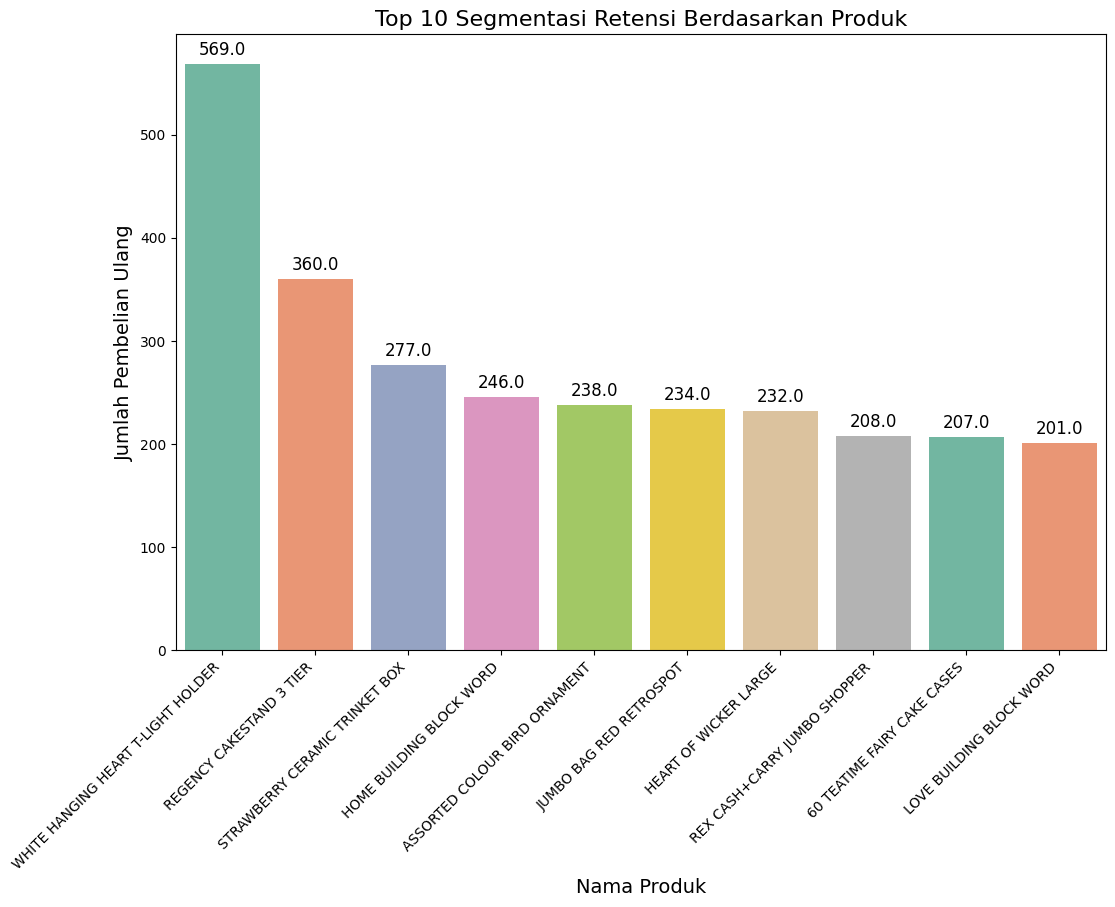

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah pesanan per produk dan pelanggan
product_retention = df.groupby(['customer_id', 'product_name'])['order_id'].nunique().reset_index()

# Menampilkan pelanggan yang membeli produk lebih dari satu kali
repeat_product_customers = product_retention[product_retention['order_id'] > 1]

# Menghitung jumlah pembelian ulang per produk
repeat_product_counts = repeat_product_customers['product_name'].value_counts()

# Menampilkan hanya top 10 produk teratas
top_10_repeat_products = repeat_product_counts.head(10)

# Visualisasi segmentasi retensi berdasarkan produk
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_repeat_products.index, y=top_10_repeat_products.values, palette='Set2')

# Menambahkan label pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Top 10 Segmentasi Retensi Berdasarkan Produk', fontsize=16)
plt.xlabel('Nama Produk', fontsize=14)
plt.ylabel('Jumlah Pembelian Ulang', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.show()


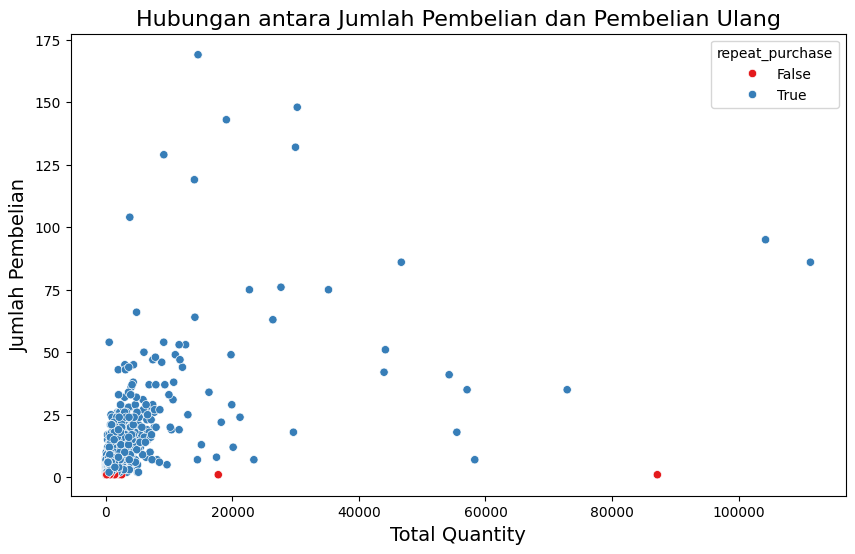

In [31]:
# Menghitung jumlah pembelian per pelanggan dan total quantity
customer_purchase = df.groupby('customer_id').agg(total_quantity=('quantity', 'sum'), total_orders=('order_id', 'nunique')).reset_index()

# Menambahkan kolom untuk pelanggan yang melakukan pembelian ulang
customer_purchase['repeat_purchase'] = customer_purchase['total_orders'] > 1

# Visualisasi hubungan antara quantity dan pembelian ulang
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_quantity', y='total_orders', data=customer_purchase, hue='repeat_purchase', palette='Set1')
plt.title('Hubungan antara Jumlah Pembelian dan Pembelian Ulang', fontsize=16)
plt.xlabel('Total Quantity', fontsize=14)
plt.ylabel('Jumlah Pembelian', fontsize=14)
plt.show()


### **Analisis Musiman dalam Retensi Pelanggan**

In [32]:
# Membuat kolom 'year_month' untuk mengelompokkan df berdasarkan bulan
df['year_month'] = df['order_date'].dt.to_period('M')

# Menghitung jumlah pelanggan yang melakukan pembelian ulang per bulan
monthly_retention = df.groupby(['year_month', 'customer_id'])['order_id'].nunique().reset_index()
repeat_monthly_customers = monthly_retention[monthly_retention['order_id'] > 1]

# Menghitung tingkat retensi per bulan
monthly_retention_rate = repeat_monthly_customers.groupby('year_month')['customer_id'].nunique() / monthly_retention.groupby('year_month')['customer_id'].nunique()

# Menampilkan tingkat retensi per bulan
monthly_retention_rate


,customer_id
year_month,
2010-01,0.310153
2010-02,0.328418
2010-03,0.347531
2010-04,0.305616
2010-05,0.343750
2010-06,0.362475
2010-07,0.373760
2010-08,0.318486
2010-09,0.330902


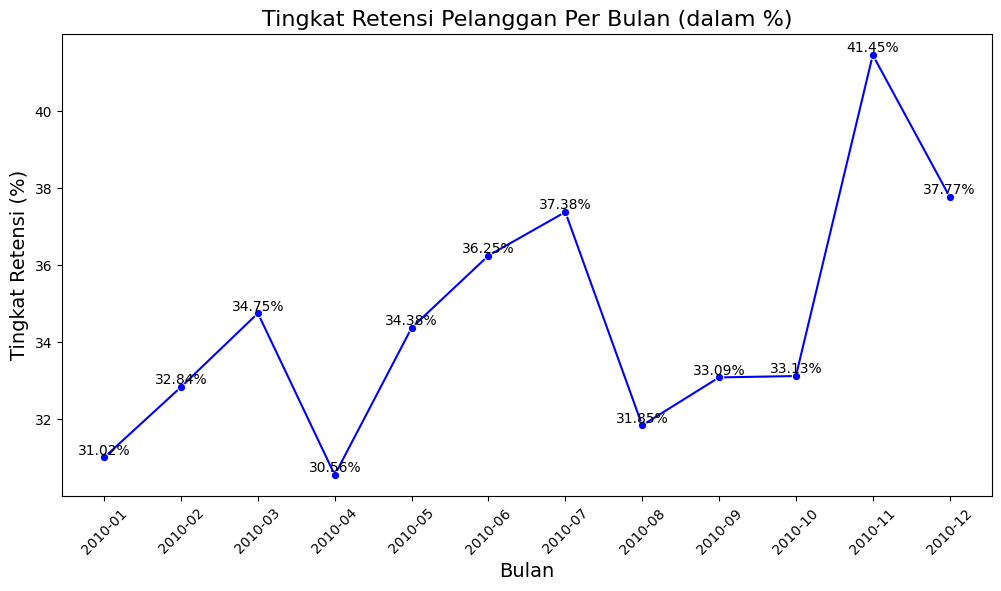

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung tingkat retensi dalam persentase
monthly_retention_rate_percentage = monthly_retention_rate * 100

# Visualisasi tingkat retensi per bulan dalam persen
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_retention_rate_percentage.index.astype(str), y=monthly_retention_rate_percentage.values, marker='o', color='b')

# Menambahkan label pada setiap titik
for i, value in enumerate(monthly_retention_rate_percentage.values):
    plt.text(x=i, y=value, s=f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

# Menambahkan label dan judul
plt.title('Tingkat Retensi Pelanggan Per Bulan (dalam %)', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Tingkat Retensi (%)', fontsize=14)
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


### **Identifikasi Churn**

In [34]:
# Menghitung jumlah pesanan per pelanggan
order_counts = df.groupby('customer_id')['order_id'].nunique()
order_counts
# Menghitung jumlah pelanggan yang melakukan lebih dari satu pembelian
repeat_customers = order_counts[order_counts > 1].count()
repeat_customers
# Menghitung total jumlah pelanggan
total_customers = order_counts.count()
total_customers
# Persentase pelanggan yang melakukan pembelian ulang
retention_percentage = (repeat_customers / total_customers) * 100
print(f"Persentase pelanggan yang melakukan pembelian ulang: {retention_percentage:.2f}%")

Persentase pelanggan yang melakukan pembelian ulang: 70.92%


In [35]:
# Menghitung pelanggan yang hanya melakukan satu pembelian
churn_customers = order_counts[order_counts == 1].count()

# Persentase pelanggan yang churn
churn_percentage = (churn_customers / total_customers) * 100
print(f"Persentase pelanggan yang hanya melakukan satu pembelian (churn): {churn_percentage:.2f}%")

Persentase pelanggan yang hanya melakukan satu pembelian (churn): 29.08%


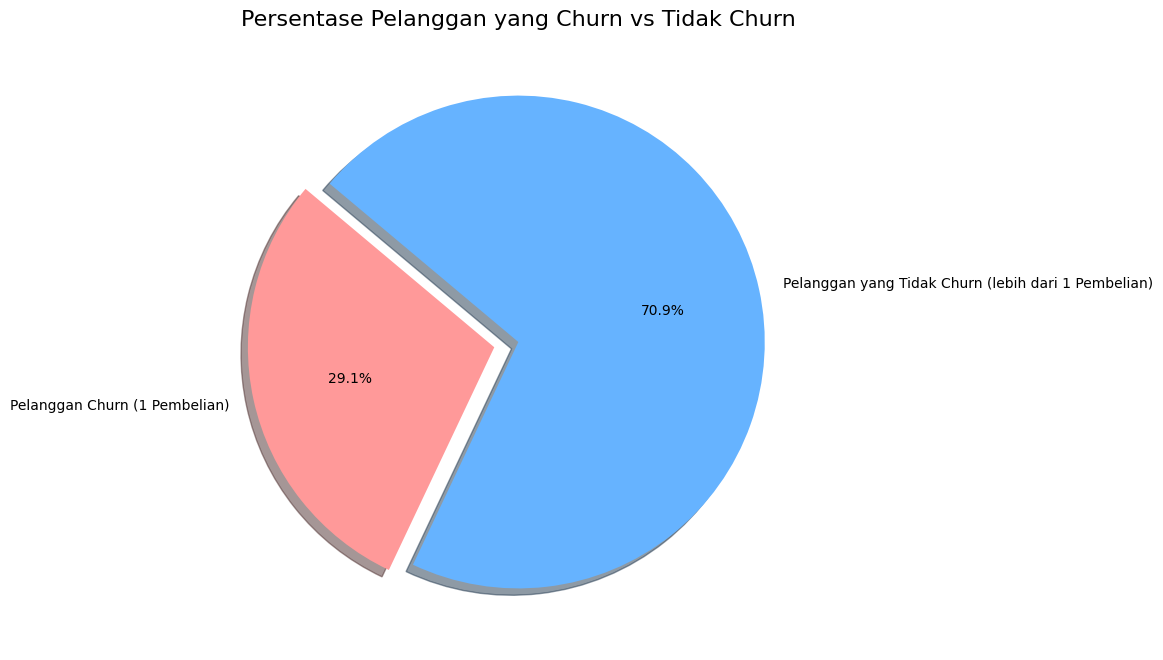

In [36]:
import matplotlib.pyplot as plt

# Menyiapkan data untuk pie chart
labels = ['Pelanggan Churn (1 Pembelian)', 'Pelanggan yang Tidak Churn (lebih dari 1 Pembelian)']
sizes = [churn_customers, total_customers - churn_customers]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # untuk memberi efek meledak pada bagian churn

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Menambahkan judul
plt.title('Persentase Pelanggan yang Churn vs Tidak Churn', fontsize=16)

# Menampilkan plot
plt.show()


### **Menganalisis Pendapatan**

Rata-rata pendapatan yang dihasilkan per pelanggan: 1875.39
Pelanggan dengan kontribusi pendapatan terbesar:
customer_id
18102.0    315546.23
13694.0    116352.97
16684.0     85595.33
17511.0     80194.33
15061.0     78614.64
16754.0     76441.96
17949.0     64999.43
12931.0     61654.15
13089.0     59677.29
17450.0     58747.38
Name: revenue, dtype: float64


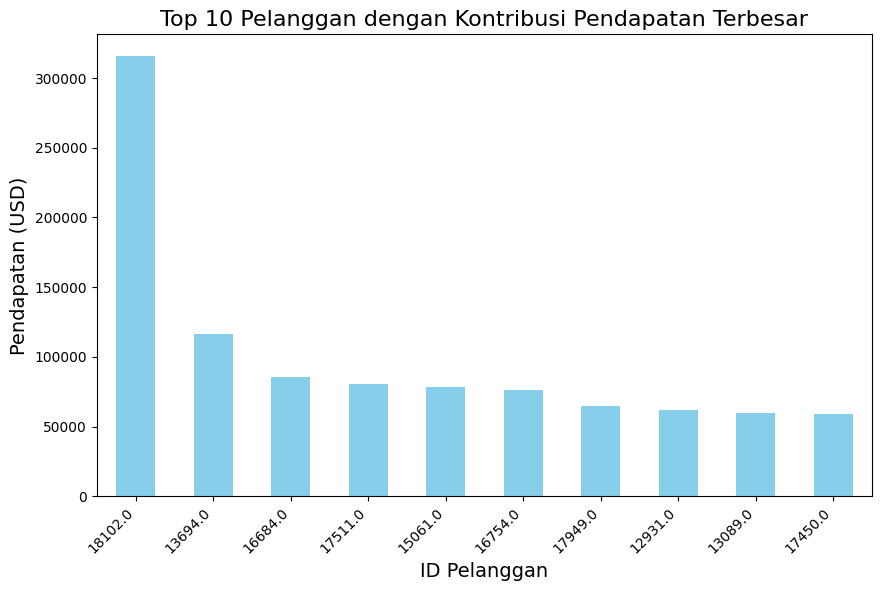

In [37]:
# Menghitung pendapatan per pelanggan
df['revenue'] = df['amount']  # Pastikan 'amount' adalah kolom yang berisi nilai transaksi
customer_revenue = df.groupby('customer_id')['revenue'].sum()

# Menghitung rata-rata pendapatan per pelanggan
average_revenue_per_customer = customer_revenue.mean()
print(f"Rata-rata pendapatan yang dihasilkan per pelanggan: {average_revenue_per_customer:.2f}")

# Menampilkan pelanggan dengan pendapatan terbesar (Top 10)
top_revenue_customers = customer_revenue.sort_values(ascending=False).head(10)
print("Pelanggan dengan kontribusi pendapatan terbesar:")
print(top_revenue_customers)

# Visualisasi pendapatan pelanggan terbesar (Top 10)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_revenue_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Pelanggan dengan Kontribusi Pendapatan Terbesar', fontsize=16)
plt.xlabel('ID Pelanggan', fontsize=14)
plt.ylabel('Pendapatan (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


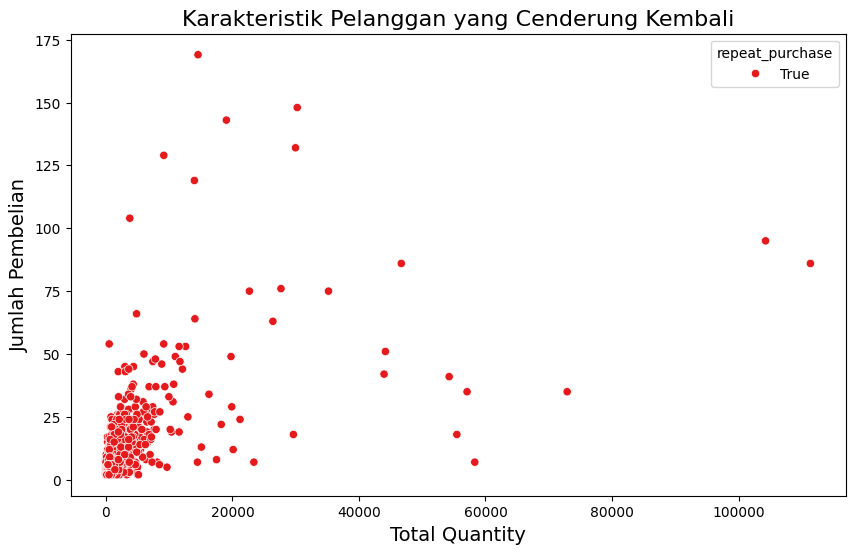

In [51]:
# Pelanggan dengan frekuensi tinggi dan pembelian besar
retention_customers = customer_purchase[customer_purchase['repeat_purchase'] == True]

# Visualisasi karakteristik pelanggan yang cenderung kembali
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_quantity', y='total_orders', data=retention_customers, hue='repeat_purchase', palette='Set1')
plt.title('Karakteristik Pelanggan yang Cenderung Kembali', fontsize=16)
plt.xlabel('Total Quantity', fontsize=14)
plt.ylabel('Jumlah Pembelian', fontsize=14)
plt.show()


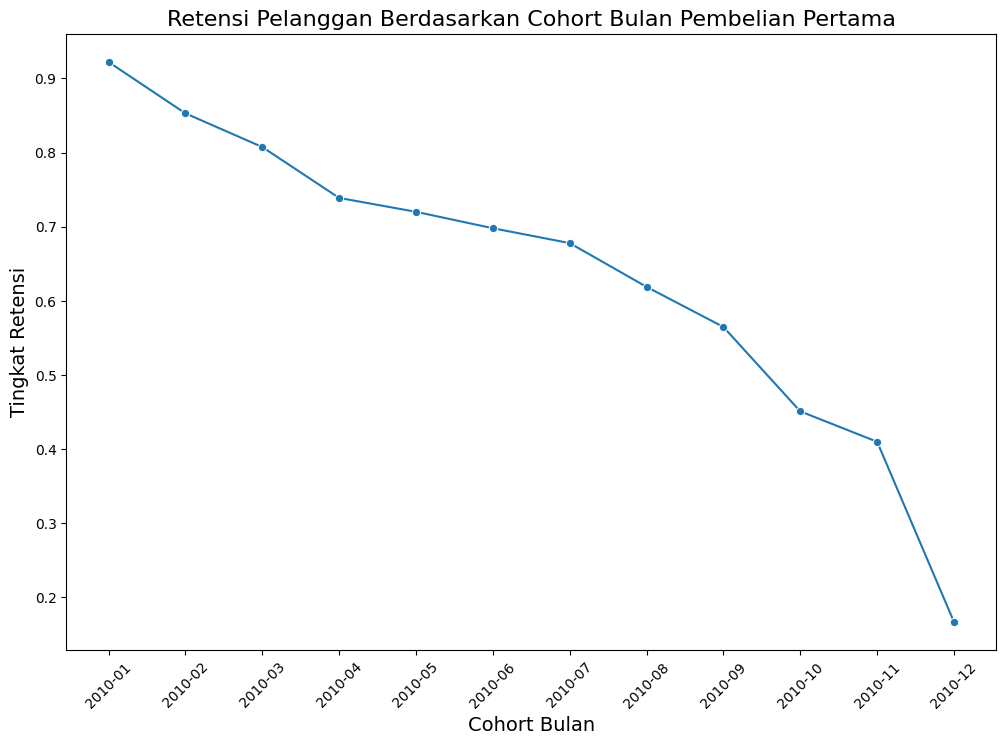

In [55]:
# Menambahkan kolom bulan pertama pembelian
df['cohort_month'] = df.groupby('customer_id')['order_date'].transform('min').dt.to_period('M')

# Menghitung retensi per cohort
cohort_retention = df.groupby(['cohort_month', 'customer_id'])['order_id'].nunique().reset_index()
cohort_retention = cohort_retention[cohort_retention['order_id'] > 1]

# Menghitung retensi per bulan cohort
cohort_monthly_retention = cohort_retention.groupby('cohort_month')['customer_id'].nunique() / df.groupby('cohort_month')['customer_id'].nunique()

# Visualisasi retensi per cohort
plt.figure(figsize=(12, 8))
sns.lineplot(x=cohort_monthly_retention.index.astype(str), y=cohort_monthly_retention.values, marker='o')
plt.title('Retensi Pelanggan Berdasarkan Cohort Bulan Pembelian Pertama', fontsize=16)
plt.xlabel('Cohort Bulan', fontsize=14)
plt.ylabel('Tingkat Retensi', fontsize=14)
plt.xticks(rotation=45)
plt.show()
